In [1]:
import pandas as pd
import numpy as np
import wget

# for visualization
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
import matplotlib.pyplot as plt
import calmap #pip install calmap
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

In [135]:
""""
urls = ['https://raw.githubusercontent.com/dsfsi/covid19africa/master/data/africa_daily_time_series_cases.csv','https://raw.githubusercontent.com/dsfsi/covid19africa/master/data/africa_daily_time_series_deaths.csv',
       'https://raw.githubusercontent.com/dsfsi/covid19africa/master/data/africa_daily_time_series_recovered.csv']
for url in urls:
    filename = wget.download(url)

100% [................................................................................] 8778 / 8778

In [2]:
conf_af = pd.read_csv('C:/Users/olani/Downloads/Documents/ML Portfolio/notebook/covid-19 notebook/africa_daily_time_series_cases.csv')
deaths_af = pd.read_csv('C:/Users/olani/Downloads/Documents/ML Portfolio/notebook/covid-19 notebook/africa_daily_time_series_deaths.csv')
recv_af = pd.read_csv('C:/Users/olani/Downloads/Documents/ML Portfolio/notebook/covid-19 notebook/africa_daily_time_series_recovered.csv')

In [3]:
dates = conf_af.columns[24:].to_list()
conf_af_concat = conf_af.melt(id_vars=['Country/Region'], 
                            value_vars=dates, var_name='Date', value_name='ConfirmedCases')

deaths_af_concat = deaths_af.melt(id_vars=['Country/Region'], 
                            value_vars=dates, var_name='Date', value_name='Deaths')

recv_af_concat = recv_af.melt(id_vars=['Country/Region'],
                              value_vars=dates, var_name='Date', value_name='Recovered')

df = pd.concat([conf_af_concat, deaths_af_concat['Deaths'],recv_af_concat['Recovered']], axis=1, sort=False)

df.head()

,Country/Region,Date,ConfirmedCases,Deaths,Recovered
0,Algeria,2/12/20,0,0,0
1,Angola,2/12/20,0,0,0
2,Benin,2/12/20,0,0,0
3,Botswana,2/12/20,0,0,0
4,Burkina Faso,2/12/20,0,0,0


# Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3657 entries, 0 to 3656
Data columns (total 5 columns):
Country/Region    3657 non-null object
Date              3657 non-null object
ConfirmedCases    3657 non-null int64
Deaths            3657 non-null int64
Recovered         3657 non-null int64
dtypes: int64(3), object(2)
memory usage: 142.9+ KB


In [5]:
# working on the date variable
df.Date = df.Date.astype('datetime64[ns]')
#df.Date = [time.date() for time in df.Date]

In [6]:
df['MortalityRate'] = df['Deaths'] / df['ConfirmedCases']
df['MortalityRate'] = df['MortalityRate'].fillna(0.0)
df['ActiveCase'] = df['ConfirmedCases'] - df['Deaths'] - df['Recovered']

In [7]:
display(df.tail())

,Country/Region,Date,ConfirmedCases,Deaths,Recovered,MortalityRate,ActiveCase
3652,Tunisia,2020-04-20,884,38,148,0.042986,698
3653,Uganda,2020-04-20,56,0,38,0.000000,18
3654,Western Sahara,2020-04-20,6,0,0,0.000000,6
3655,Zambia,2020-04-20,65,3,35,0.046154,27
3656,Zimbabwe,2020-04-20,25,3,2,0.120000,20


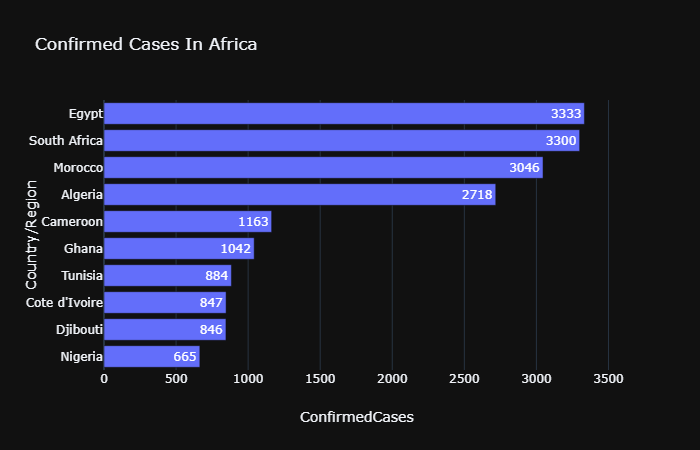

In [14]:
# Which country has the highest case of the virus as at 13 April 2020
current = df[df['Date'] == max(df['Date'])].reset_index()
current_case = current.groupby('Country/Region')['ConfirmedCases','Deaths','Recovered','MortalityRate','ActiveCase'].sum().reset_index()
highest_case = current.groupby('Country/Region')['ConfirmedCases'].sum().reset_index()
fig = px.bar(highest_case.sort_values('ConfirmedCases', ascending=False)[:10][::-1], 
             x='ConfirmedCases', y='Country/Region',
             title='Confirmed Cases In Africa', text='ConfirmedCases', height=500, orientation='h')
fig.show('png')

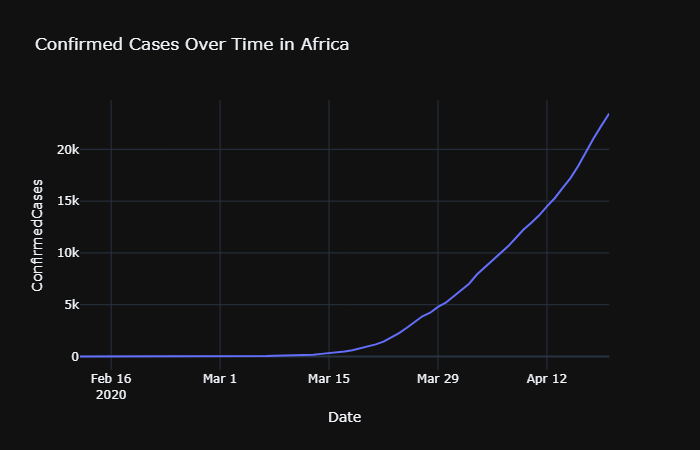

In [10]:
# in confirmed cases over time
c_case =df.groupby('Date')['ConfirmedCases'].sum().reset_index()
fig = px.line(c_case, x="Date", y="ConfirmedCases", 
              title="Confirmed Cases Over Time in Africa")
fig.show('png')

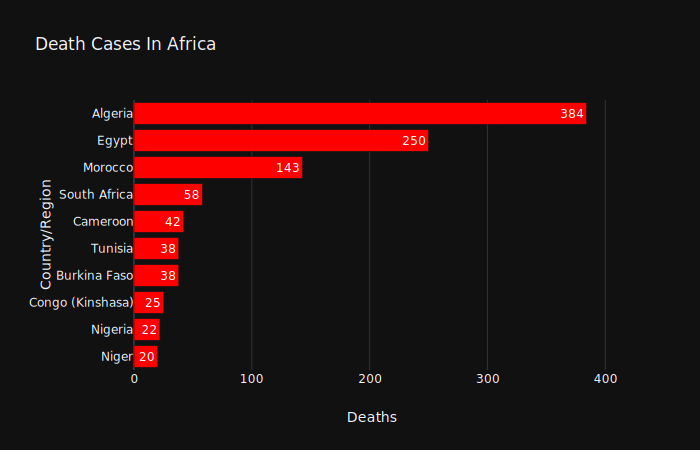

In [11]:
# countries with the highest death rate
highest_death = current.groupby('Country/Region')['Deaths'].sum().reset_index()
fig = px.bar(highest_death.sort_values('Deaths',ascending=False)[:10][::-1],
            x='Deaths',y='Country/Region',color_discrete_sequence=['Red'],
             title='Death Cases In Africa', text='Deaths', height=500, orientation='h')
fig.show('svg')

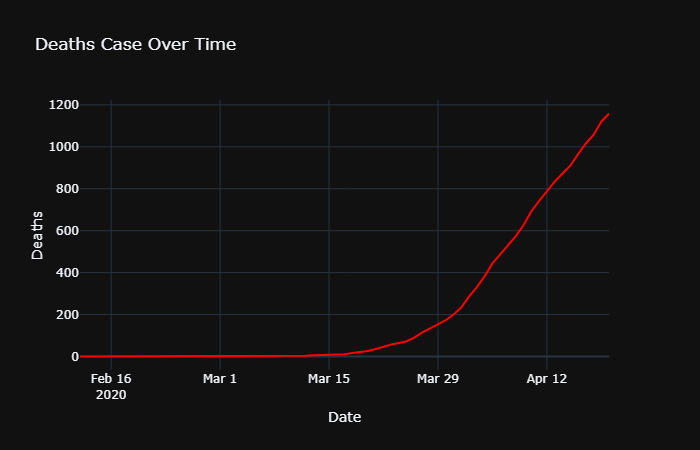

In [12]:
# increase in deaths cases over time
death_case = df.groupby('Date')['Deaths'].sum().reset_index()
fig = px.line(death_case, x="Date", y="Deaths", color_discrete_sequence=['Red'],
              title="Deaths Case Over Time")
fig.show('png')

In [15]:
# the death cases, confirmed cases and mortality rate of african countries as at 20 April 2020
africa_group=current_case.groupby('Country/Region')['ConfirmedCases', 'Deaths','MortalityRate','ActiveCase'].sum().reset_index()
africa_group.sort_values('ConfirmedCases', ascending=False)[['Country/Region', 'ConfirmedCases','Deaths','MortalityRate','ActiveCase']].style.background_gradient(cmap='Reds')

,Country/Region,ConfirmedCases,Deaths,MortalityRate,ActiveCase
14,Egypt,3333,250,0.0750075,2262
43,South Africa,3300,58,0.0175758,2187
32,Morocco,3046,143,0.0469468,2553
0,Algeria,2718,384,0.14128,1235
7,Cameroon,1163,42,0.0361135,816
21,Ghana,1042,9,0.00863724,934
48,Tunisia,884,38,0.0429864,698
12,Cote d'Ivoire,847,9,0.0106257,578
13,Djibouti,846,2,0.00236407,742
36,Nigeria,665,22,0.0330827,455


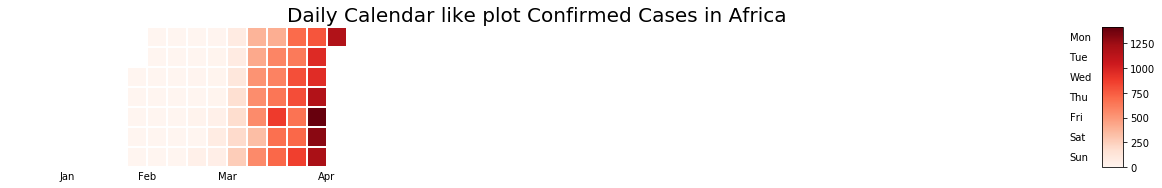

In [16]:
# for confirmed cases
temp = df.groupby('Date')['ConfirmedCases'].sum()
temp = temp.diff()
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(111)
plt.title('Daily Calendar like plot Confirmed Cases in Africa',fontsize=20)
cax = calmap.yearplot(temp, fillcolor='white', ax=ax, cmap='Reds',monthlabels=['Jan', 'Feb', 'Mar', 'Apr'],
                     linewidth=0.9)
divider = make_axes_locatable(cax)
lcax = divider.append_axes("right", size="2%", pad=0.5)
fig.colorbar(cax.get_children()[1], cax=lcax)